In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_openml

%matplotlib inline

In [2]:
%cd Z:\PPMI_Data\Excels\NonMotors\The251\Male\GeneCpG\UPSIT
df = pd.read_csv ("UPSIT3Categ_Methylome_Male.csv")
print(df.shape)
df.head(2)

Z:\PPMI_Data\Excels\NonMotors\The251\Male\GeneCpG\UPSIT
(307, 5679)


,Sentrix,PATNO,HYS,Gender,APPRDX,UPSIT_3,UPSIT_Total,cg06067658,cg15442538,cg25928446,...,cg05766881,cg01708543,cg10933281,cg04735449,cg15856662,cg11864127,cg14420798,cg08859349,cg01481205,cg19228755
0,200991620021_R01C01,3001,2,1,1,1,25,0.088679,0.890148,0.719238,...,0.748763,0.830052,0.861102,0.855659,0.788271,0.805084,0.729165,0.803183,0.925666,0.849608
1,200973410167_R04C01,3007,2,1,1,2,18,0.128668,0.916448,0.726893,...,0.886279,0.898054,0.896800,0.911732,0.863749,0.893595,0.829444,0.866504,0.917233,0.786606


In [3]:
df_data = df.drop(['PATNO', 'Sentrix', 'HYS', 'Gender', 'UPSIT_3','UPSIT_Total','APPRDX'], axis=1)
df_data.head(2)

,cg06067658,cg15442538,cg25928446,cg12415575,cg26358225,cg19058526,cg20195763,cg23725394,cg27107076,cg15657055,...,cg05766881,cg01708543,cg10933281,cg04735449,cg15856662,cg11864127,cg14420798,cg08859349,cg01481205,cg19228755
0,0.088679,0.890148,0.719238,0.066678,0.151532,0.133249,0.479724,0.926745,0.538423,0.697562,...,0.748763,0.830052,0.861102,0.855659,0.788271,0.805084,0.729165,0.803183,0.925666,0.849608
1,0.128668,0.916448,0.726893,0.066768,0.198886,0.141136,0.412058,0.876792,0.665097,0.797354,...,0.886279,0.898054,0.896800,0.911732,0.863749,0.893595,0.829444,0.866504,0.917233,0.786606


In [4]:
# Perform PCA and save first 10 PCs
pca = PCA(n_components=10)
pca.fit(df_data)
pca_components = pca.transform(df_data)
df_pca = pd.DataFrame(data=pca_components, columns=[f"PC{i}" for i in range(1, 11)])

# Add targets to PCA dataframe
df_pca["APPRDX"] = df["APPRDX"]

# Define colors and legend
colors = {"1": "#F1746B", "2": "#36C3D1"}
custom_lines = [Line2D([0], [0], marker='o', label='Scatter', markerfacecolor='#F1746B', markersize=30, color='floralwhite'),
                Line2D([0], [0], marker='o', label='Scatter', markerfacecolor='#36C3D1', markersize=30, color='floralwhite')]


In [5]:
# Print summary of PCA results
print("PCA explained variance ratio:", pca.explained_variance_ratio_)

PCA explained variance ratio: [0.13633155 0.08441189 0.05603154 0.02744378 0.02238754 0.01861408
 0.01625278 0.014421   0.01380164 0.01355585]


In [6]:
# Display PCA dataframe
print(df_pca.head(2))

        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  0.519308  0.338740 -0.398344 -0.462871 -0.455071  0.916569  0.034620   
1  1.431714  0.471253  0.497881  1.209435  0.035020  1.232942 -0.430276   

        PC8       PC9      PC10  APPRDX  
0 -0.194242 -0.473534  0.513135       1  
1  0.088241  0.594285  0.528180       1  


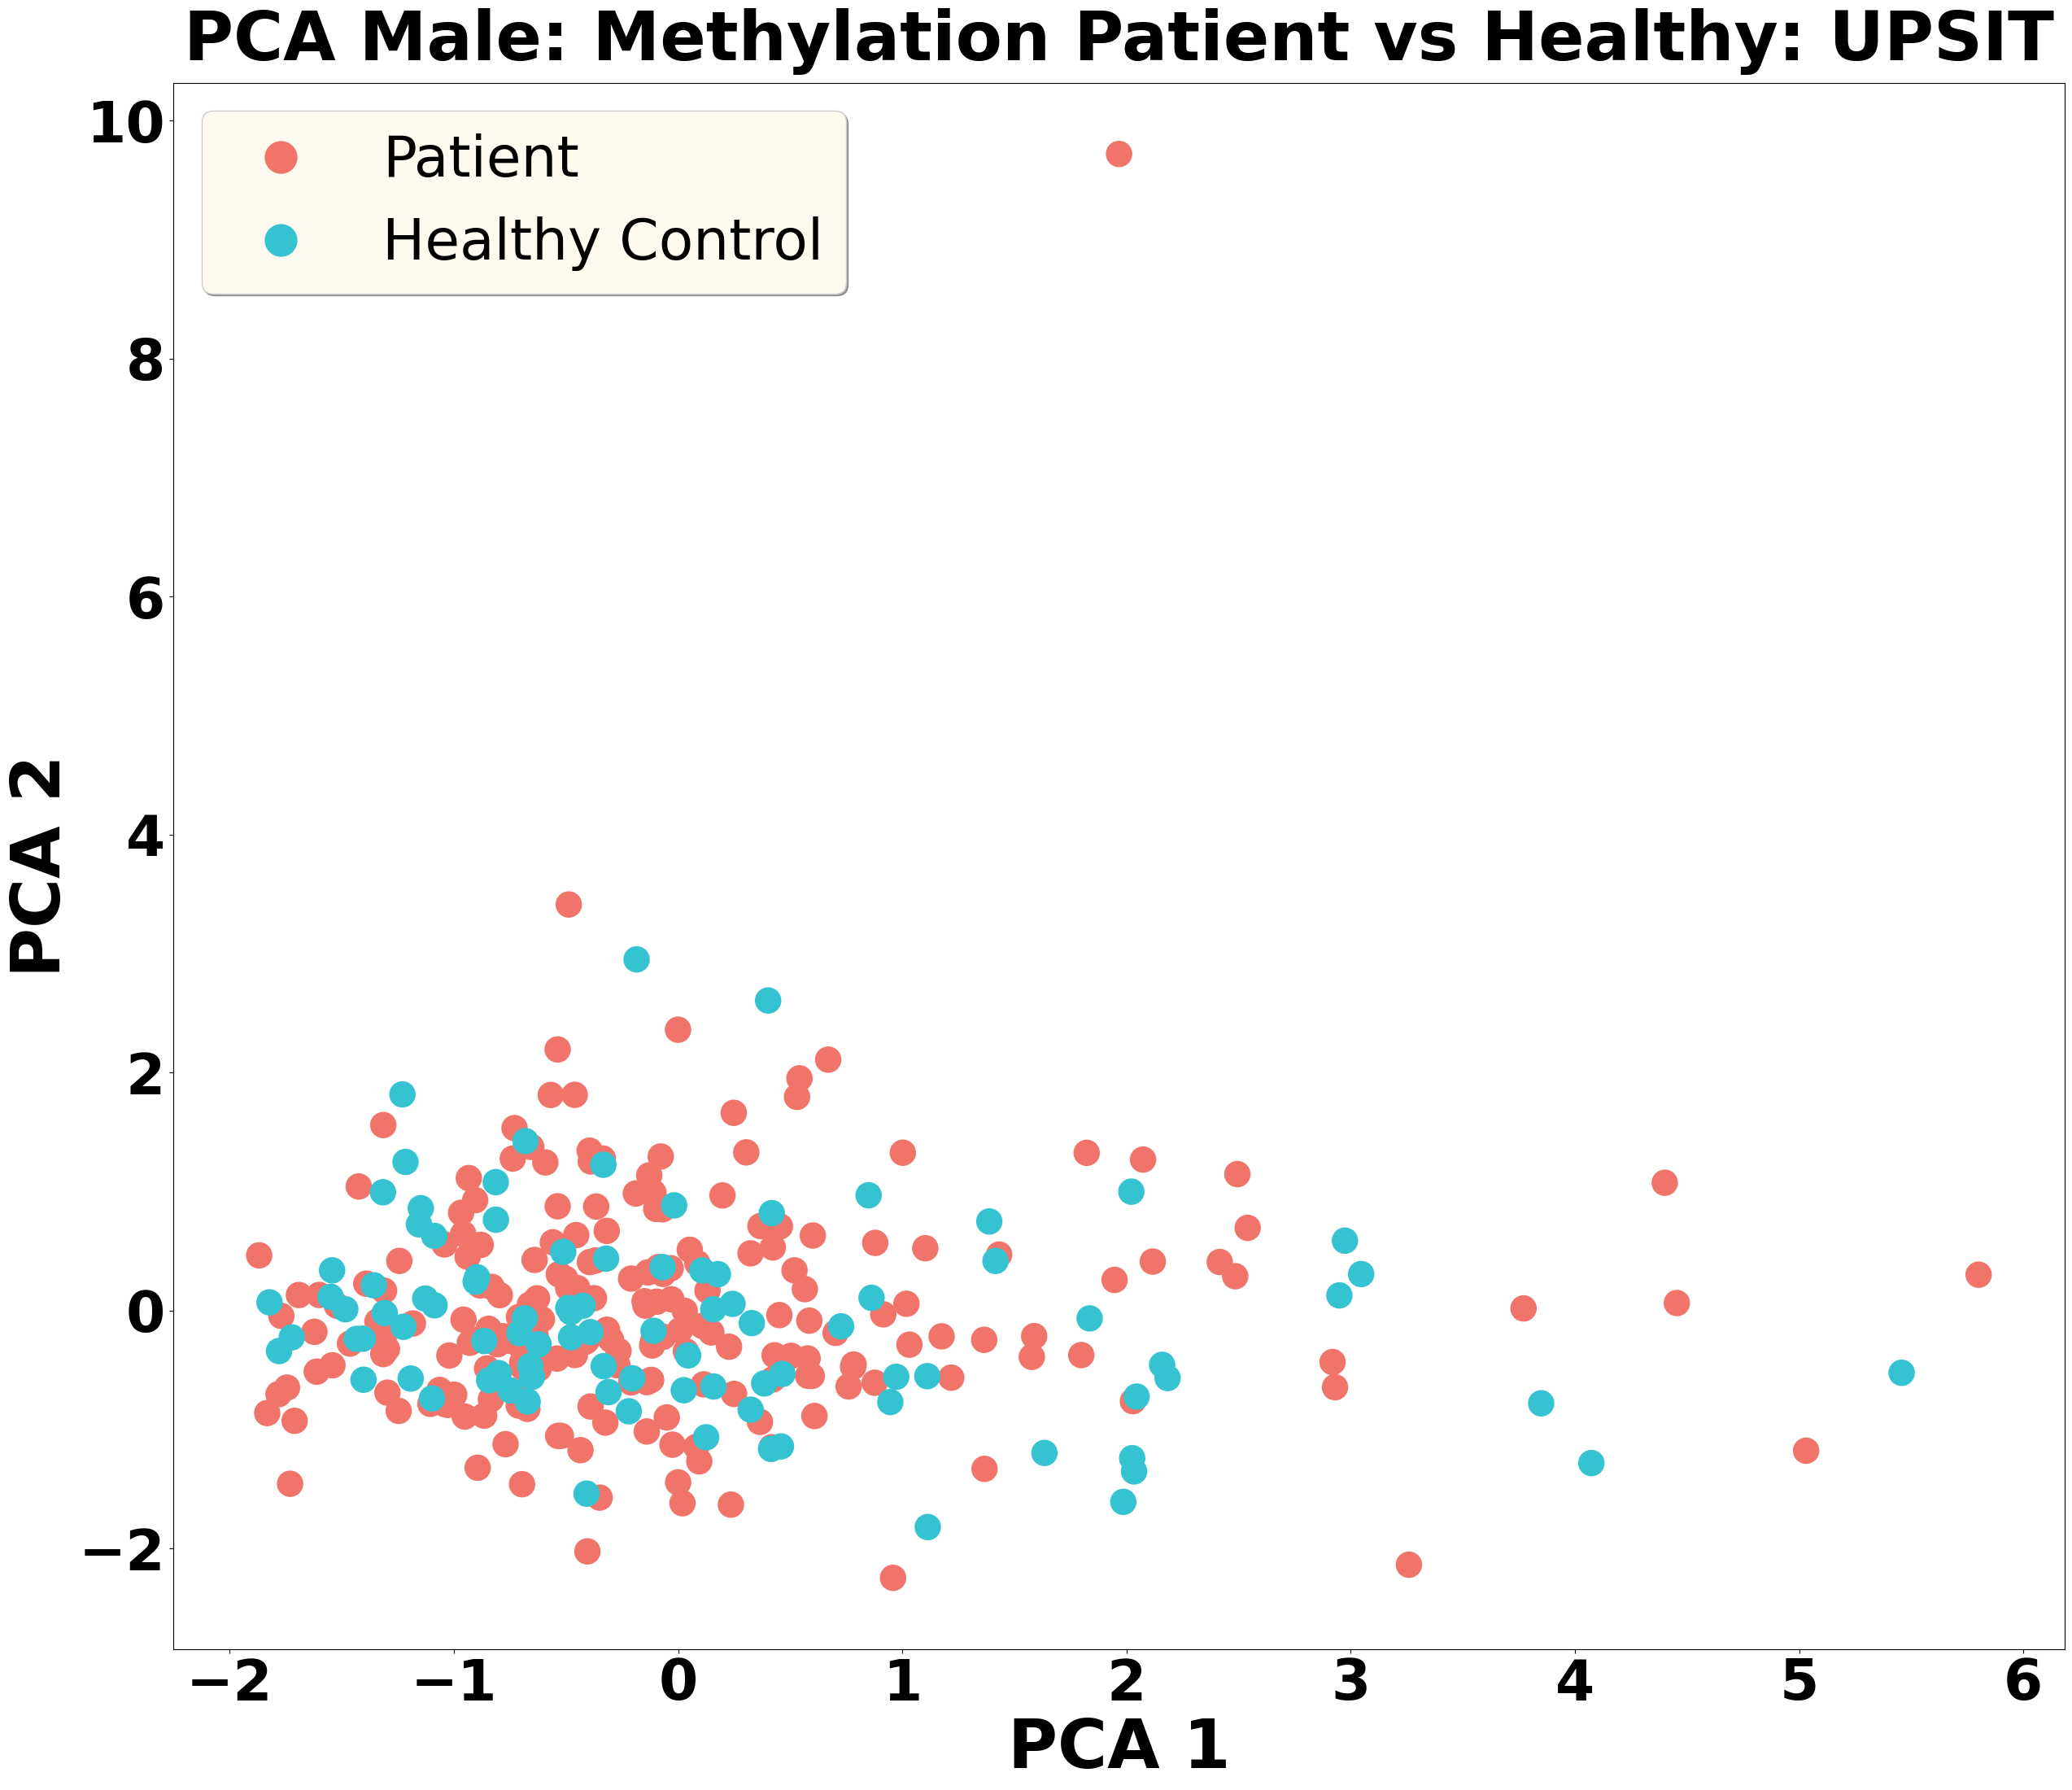

In [7]:

# Plot PCA 1 vs PCA 2
plt.figure(figsize=(30, 25))
plt.scatter(df_pca["PC1"], df_pca["PC2"], c=df_pca["APPRDX"].astype(str).map(colors), s=500)
plt.xlabel('PCA 1', fontsize=60, fontweight='bold', color='black')
plt.ylabel('PCA 2', fontsize=60, fontweight='bold', color='black')
plt.xticks(fontsize=50, fontweight='bold', color='black')
plt.yticks(fontsize=50, fontweight='bold', color='black')
plt.legend(custom_lines, ['Patient', 'Healthy Control'], loc='upper left', shadow=True,
           facecolor='floralwhite', prop={'size': 50})
plt.title(label="PCA Male: Methylation Patient vs Healthy: UPSIT", fontsize=60, fontweight='bold',
          color="black", pad=20)
plt.savefig("PCA_PCA1vsPCA2_CpG_PatVsHealthy_UPSIT.pdf", format="pdf")
plt.savefig("PCA_PCA1vsPCA2_CpG_PatVsHealthy_UPSIT.svg", format="svg")
plt.show()
